In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 500
x0 = 50
sigma = 20
dt = 0.01
frames = 100000
x = np.arange(L)
k = 2 * np.pi * np.fft.fftfreq(L)
k0 = 0.0

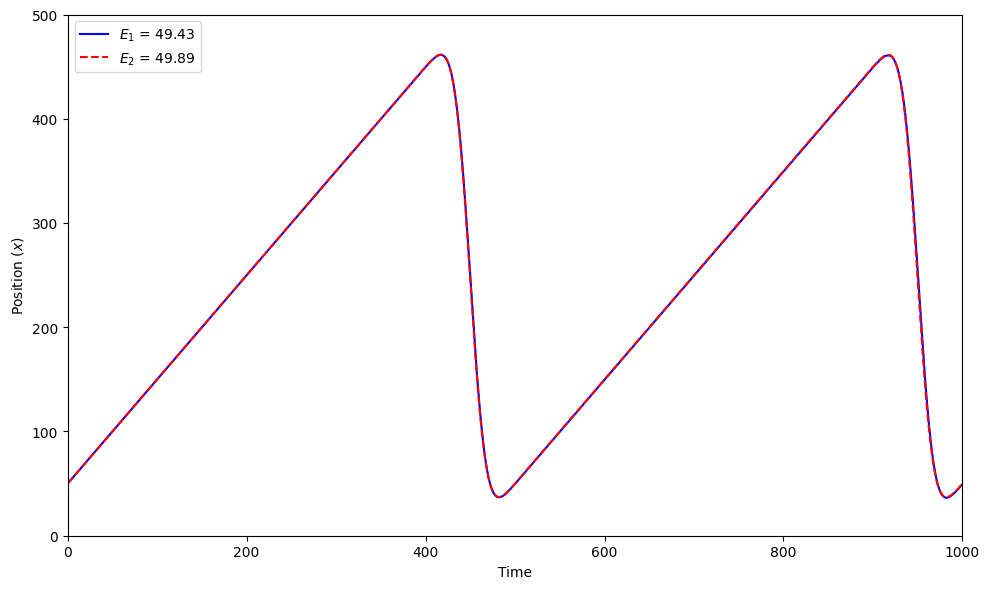

In [3]:
psi0 = np.exp(-((x - x0)**2) / (2 * sigma**2)) * np.exp(1j * k0 * (x - x0))
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2))  # Normalize
# Lists to store results for E1 and E2
time_list = []
x_c_E1_list = []  # Center of mass for E1
x_c_E2_list = []  # Center of mass for E2

# Initialize wave packets for E1 and E2
psi_E1 = psi0.copy()
psi_E2 = psi0.copy()

# Time evolution loop
for frame in range(frames):
    # Calculate center of mass for E1
    x_c_E1 = np.sum(x * np.abs(psi_E1)**2) / np.sum(np.abs(psi_E1)**2)
    #t_E1 = 2 * x_c_E1 / L  # Linear tilt for E1
    t_E1=0

    # Calculate center of mass for E2
    x_c_E2 = np.sum(x * np.abs(psi_E2)**2) / np.sum(np.abs(psi_E2)**2)
    #t_E2 = 2 * x_c_E2 / L  # Linear tilt for E2
    t_E2=0

    # Store results
    time_list.append(frame * dt)
    x_c_E1_list.append(x_c_E1)
    x_c_E2_list.append(x_c_E2)

    # Time evolution for E1
    psi_k_E1 = np.fft.fft(psi_E1)
    E1 = np.sin(k) - t_E1 * np.sin(k)  # Dispersion relation for E1
    psi_k_E1 *= np.exp(-1j * E1 * dt)  # Time evolution for E1
    psi_E1 = np.fft.ifft(psi_k_E1)
    psi_E1 /= np.sqrt(np.sum(np.abs(psi_E1)**2))  # Normalize

    # Time evolution for E2
    psi_k_E2 = np.fft.fft(psi_E2)
    E2 = 2 * (np.sin(k / 2)) - t_E2 * np.sin(k)  # Dispersion relation for E2
    psi_k_E2 *= np.exp(-1j * E2 * dt)  # Time evolution for E2
    psi_E2 = np.fft.ifft(psi_k_E2)
    psi_E2 /= np.sqrt(np.sum(np.abs(psi_E2)**2))  # Normalize

# Extract final positions
final_x_c_E1 = x_c_E1_list[-1]
final_x_c_E2 = x_c_E2_list[-1]

# Plot position vs. time for E1 and E2
plt.figure(figsize=(10, 6))
plt.plot(time_list, x_c_E1_list, label=f'$E_1$ = {final_x_c_E1:.2f}', color='blue')
plt.plot(time_list, x_c_E2_list, label=f'$E_2$ = {final_x_c_E2:.2f}', color='red', linestyle='--')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Position $(x)$')
plt.xlim(0, frames * dt)
plt.ylim(0, L)
#plt.title(f'Wavepacket Position vs. Time for $k_0 = {k0}$')
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.savefig("Wavepacket_Position_E1_E2_comparison.png", dpi=600, bbox_inches='tight')
plt.show()